In [11]:
!pip install opendatasets

In [12]:
import opendatasets as od
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the features (important for PCA)
from sklearn.preprocessing import StandardScaler
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report , confusion_matrix
import joblib




In [3]:
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [3]:
link = "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud"

create a kaggle account generate api key

{"username":"","key":""}

In [4]:
od.download(link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ihaart
Your Kaggle Key: ··········


100%|██████████| 66.0M/66.0M [00:00<00:00, 171MB/s]


In [13]:
data = pd.read_csv("/content/creditcardfraud/creditcard.csv")

In [14]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
# Data preprocessing
# Handling missing values (if any)
data.fillna(0, inplace=True)

In [16]:
# Split data into features and target
X = data.drop("Class", axis=1)
y = data["Class"]

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

# Load and preprocess your credit card fraud dataset
# Ensure you have features (X) and labels (y) properly prepared

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVC": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Hyperparameters to tune for each model
param_grid = {
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [3, 5, 7, 10]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 7, 10]
    },
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "penalty": ["l2"],  # Use 'l2' penalty instead of 'l1'
        "solver": ["lbfgs", "liblinear"]  # You can specify other solvers as well
    },
    "SVC": {
        "C": [0.1, 1],
        "kernel": ["linear", "rbf"]
    }
}


In [20]:
import joblib

results = {}

# Train and tune models
for model_name, model in models.items():
    print(f"Training {model_name}...")

    grid_search = GridSearchCV(model, param_grid[model_name], cv=StratifiedKFold(n_splits=5), scoring="accuracy")
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results[model_name] = {
        "model": best_model,
        "accuracy": accuracy,
        "best_params": grid_search.best_params_
    }

    # Save the trained model to a file
    model_filename = f"{model_name}_model.joblib"
    joblib.dump(best_model, model_filename)

Training Decision Tree...


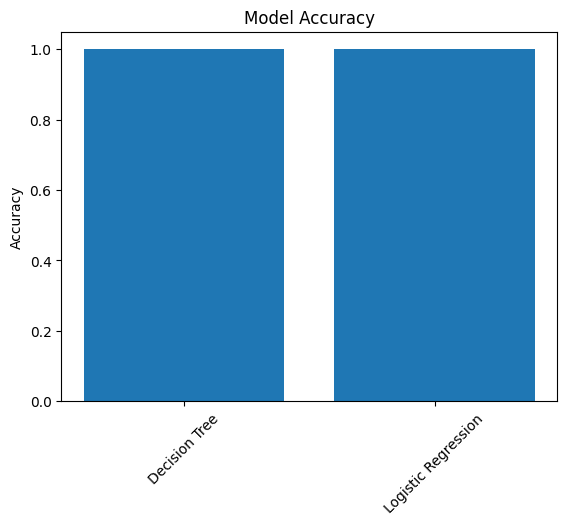

Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5}
Accuracy for Decision Tree: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.81      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Best hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression: 0.9991
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



['trained_models_results.joblib']

In [10]:


# Plot results
fig, ax = plt.subplots()
models = list(results.keys())
accuracies = [results[model]["accuracy"] for model in models]

ax.bar(models, accuracies)
ax.set_ylabel("Accuracy")
ax.set_title("Model Accuracy")
plt.xticks(rotation=45)
plt.show()

# Print best hyperparameters and accuracy for each model
for model_name, result in results.items():
    print(f"Best hyperparameters for {model_name}: {result['best_params']}")
    print(f"Accuracy for {model_name}: {result['accuracy']:.4f}")
    print(classification_report(y_test, result["model"].predict(X_test)))

# Save the results dictionary to a file
joblib.dump(results, "trained_models_results.joblib")

